<a href="https://colab.research.google.com/github/EugIva/ProzorovEI209M_CV/blob/main/HW1_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from collections import deque

def preprocess_image(image: np.ndarray) -> np.ndarray:
    """
    Преобразует изображение в двоичный формат.

    :param image: исходное изображение
    :return: двоичное изображение
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    return binary

def find_start_and_end(binary: np.ndarray) -> tuple:
    """
    Находит начальную и конечную точки в лабиринте.

    :param binary: двоичное изображение лабиринта
    :return: координаты начальной и конечной точек
    """
    height, width = binary.shape
    start = (0, np.where(binary[0] == 255)[0][0])
    end = (height - 1, np.where(binary[-1] == 255)[0][0])
    return start, end

def find_path(binary: np.ndarray, start: tuple, end: tuple) -> list:
    """
    Находит путь через лабиринт с использованием алгоритма BFS.

    :param binary: двоичное изображение лабиринта
    :param start: координаты начальной точки
    :param end: координаты конечной точки
    :return: список координат пути
    """
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    queue = deque([start])
    visited = set([start])
    prev = {start: None}

    while queue:
        current = queue.popleft()

        if current == end:
            break

        for move in moves:
            neighbor = (current[0] + move[0], current[1] + move[1])

            if (0 <= neighbor[0] < binary.shape[0]) and (0 <= neighbor[1] < binary.shape[1]) and binary[neighbor] == 255 and neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)
                prev[neighbor] = current

    path = []
    if end in prev:
        step = end
        while step:
            path.append(step)
            step = prev[step]
        path.reverse()

    return path

def find_way_from_maze(image: np.ndarray) -> tuple:
    """
    Найти путь через лабиринт.

    :param image: изображение лабиринта
    :return: координаты пути через лабиринт в виде (x, y) или None, если путь не найден
    """
    binary = preprocess_image(image)
    start, end = find_start_and_end(binary)
    path = find_path(binary, start, end)

    if path:
        x_coords, y_coords = zip(*path)
        return np.array(x_coords), np.array(y_coords)
    else:
        return None

In [ ]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.

    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))

    axs.imshow(image)
    axs.axis('off')
    plt.plot()

In [ ]:
def plot_maze_path(image: np.ndarray, coords: np.ndarray) -> np.ndarray:
    if image.ndim != 3:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    img_wpath = image.copy()
    if coords:
        x, y = coords
        img_wpath[x, y, :] = [255, 0, 0]

    return img_wpath

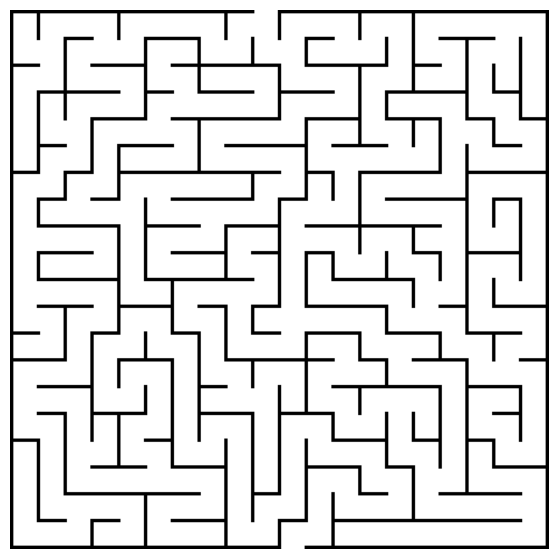

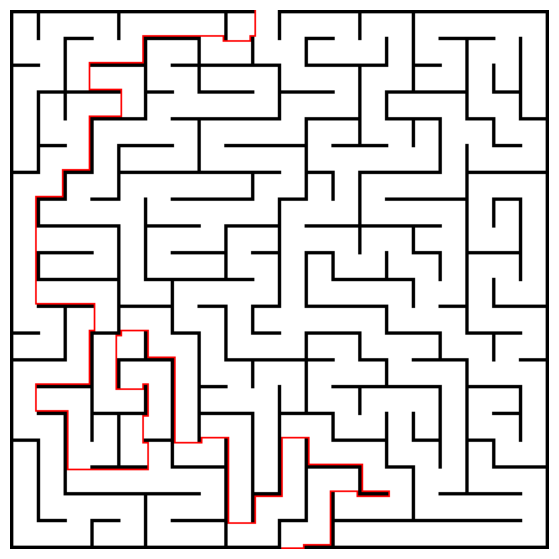

In [ ]:
test_image = cv2.imread('20 by 20 orthogonal maze.png')  # загрузить тестовую картинку

plot_one_image(test_image)

way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт.

image_with_way = plot_maze_path(test_image, way_coords)

plot_one_image(image_with_way)

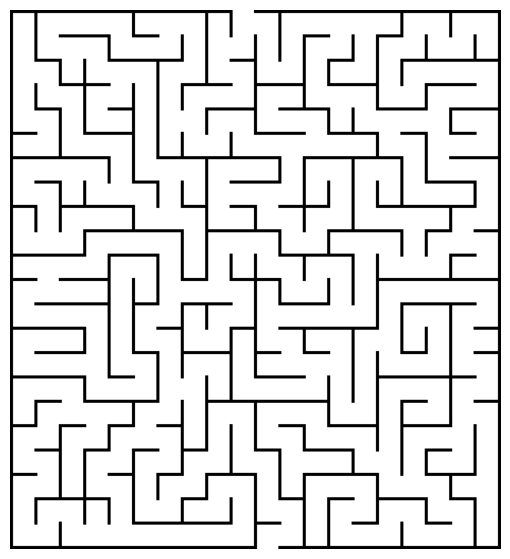

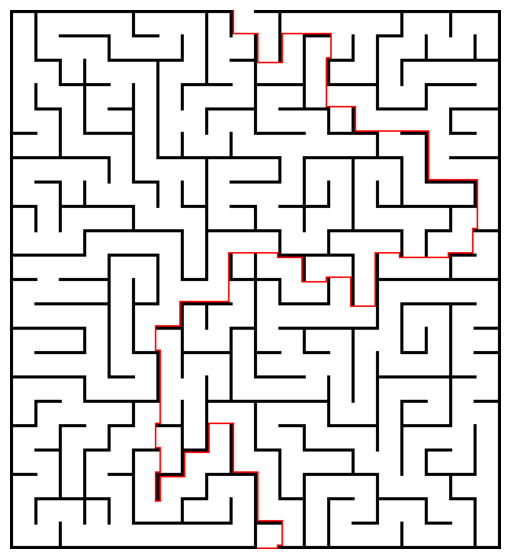

In [19]:
test_image = cv2.imread('20 by 22 orthogonal maze.png')  # загрузить тестовую картинку

plot_one_image(test_image)

way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт.

image_with_way = plot_maze_path(test_image, way_coords)

plot_one_image(image_with_way)

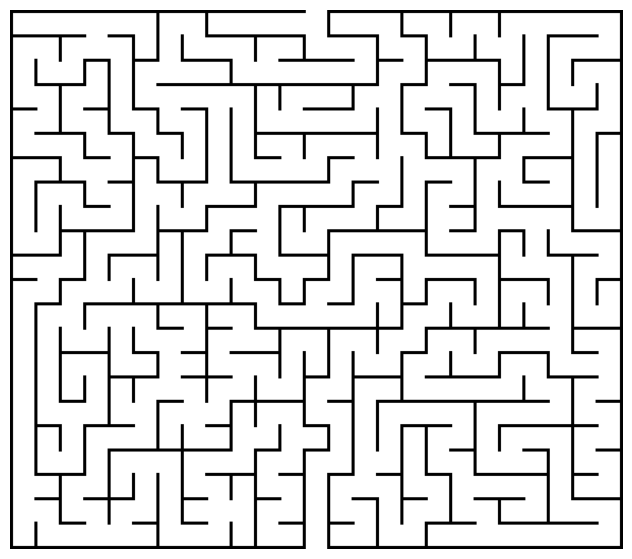

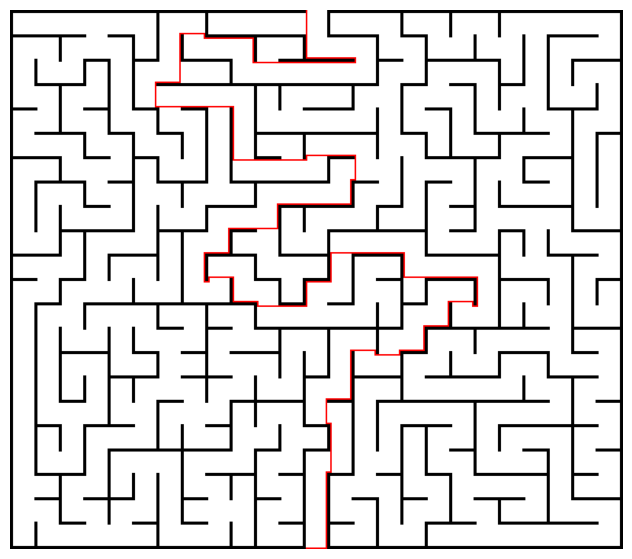

In [20]:
test_image = cv2.imread('25 by 22 orthogonal maze.png')  # загрузить тестовую картинку

plot_one_image(test_image)

way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт.

image_with_way = plot_maze_path(test_image, way_coords)

plot_one_image(image_with_way)

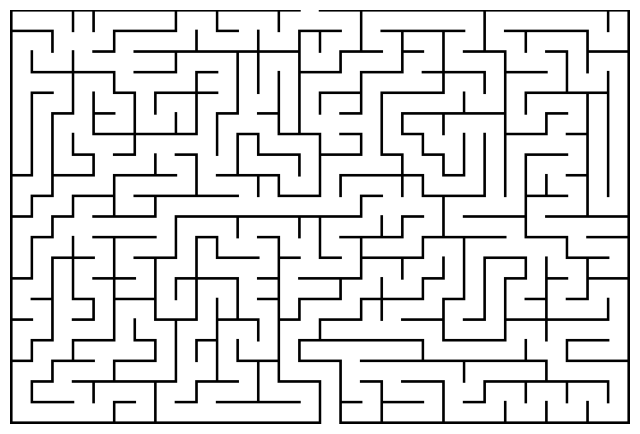

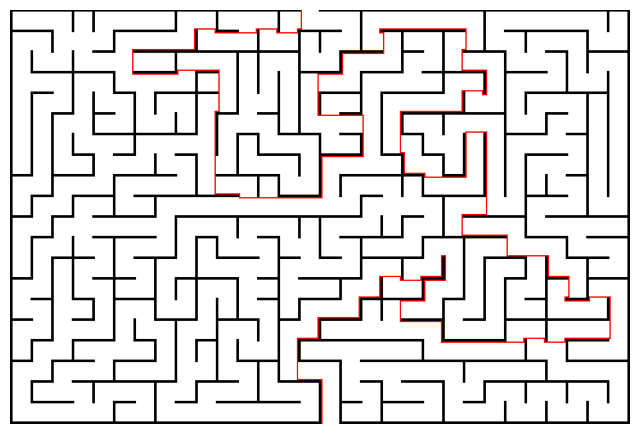

In [21]:
test_image = cv2.imread('30 by 20 orthogonal maze.png')  # загрузить тестовую картинку

plot_one_image(test_image)

way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт.

image_with_way = plot_maze_path(test_image, way_coords)

plot_one_image(image_with_way)

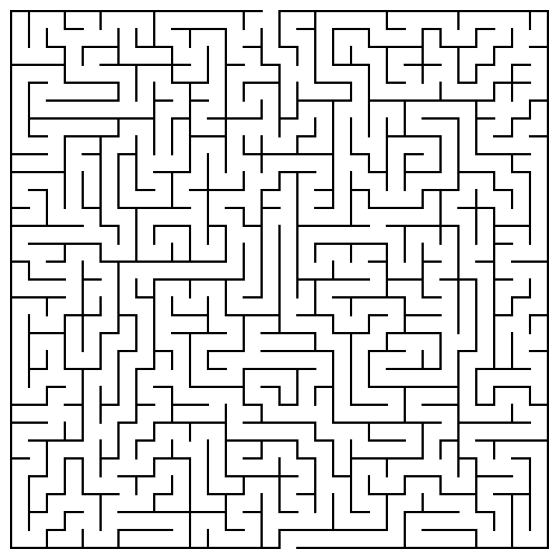

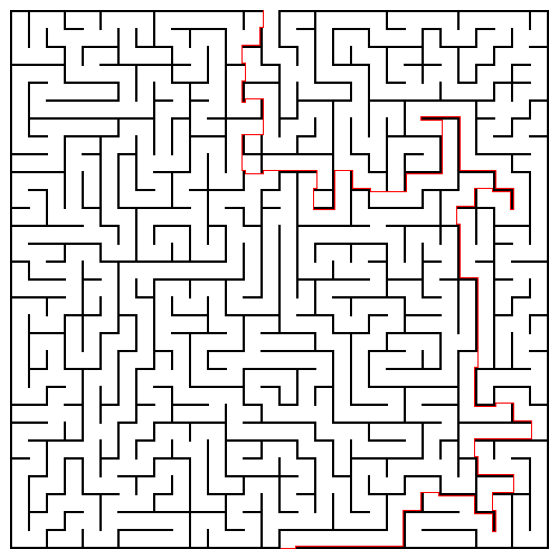

In [22]:
test_image = cv2.imread('30 by 30 orthogonal maze.png')  # загрузить тестовую картинку

plot_one_image(test_image)

way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт.

image_with_way = plot_maze_path(test_image, way_coords)

plot_one_image(image_with_way)